######AdiPokharna
# Chit 1

*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD with 11 epochs
    e. Evaluate the network  
    f. Plot the training loss and accuracy


## a. Import the necessary packages


In [ ]:
import matplotlib.pyplot as plt
import keras

## b. Load the training and testing data


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


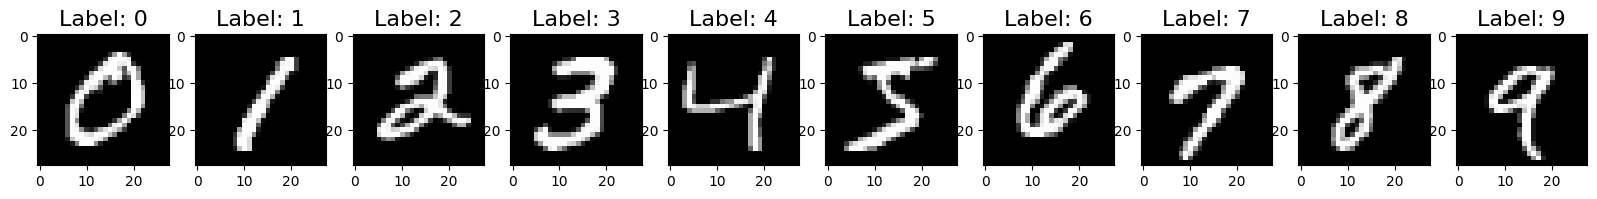

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


## c. Define the network architecture using Keras


In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

# Training the model using SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## d. Train the model using SGD with 11 epochs


In [ ]:
batch_size = 512
epochs = 11 # As per the problem statement
# epochs = 100

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/11
118/118 [==============================] - 2s 9ms/step - loss: 0.9206 - accuracy: 0.7375
Epoch 2/11
118/118 [==============================] - 1s 8ms/step - loss: 0.4215 - accuracy: 0.8789
Epoch 3/11
118/118 [==============================] - 1s 9ms/step - loss: 0.3479 - accuracy: 0.8990
Epoch 4/11
118/118 [==============================] - 1s 8ms/step - loss: 0.3093 - accuracy: 0.9118
Epoch 5/11
118/118 [==============================] - 1s 8ms/step - loss: 0.2768 - accuracy: 0.9201
Epoch 6/11
118/118 [==============================] - 1s 8ms/step - loss: 0.2535 - accuracy: 0.9271
Epoch 7/11
118/118 [==============================] - 1s 8ms/step - loss: 0.2339 - accuracy: 0.9330
Epoch 8/11
118/118 [==============================] - 1s 8ms/step - loss: 0.2168 - accuracy: 0.9375
Epoch 9/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2038 - accuracy: 0.9414
Epoch 10/11
118/118 [==============================] - 1s 9ms/step - loss: 0.1903 - accuracy: 0.9452

## e. Evaluate the network  

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9549
Test Loss: 0.14835691452026367, Test Accuracy: 0.9549000263214111


In [ ]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


## f. Plot the training loss and accuracy

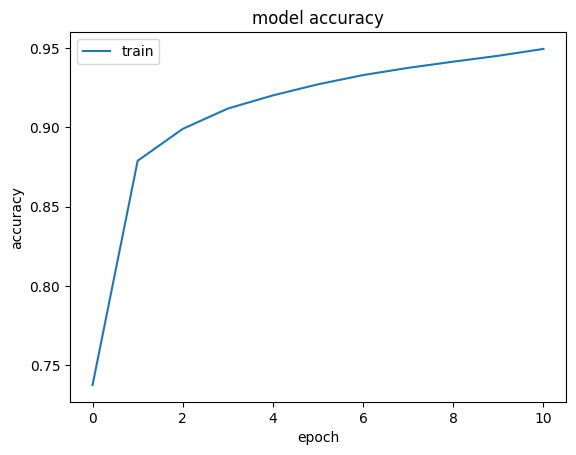

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


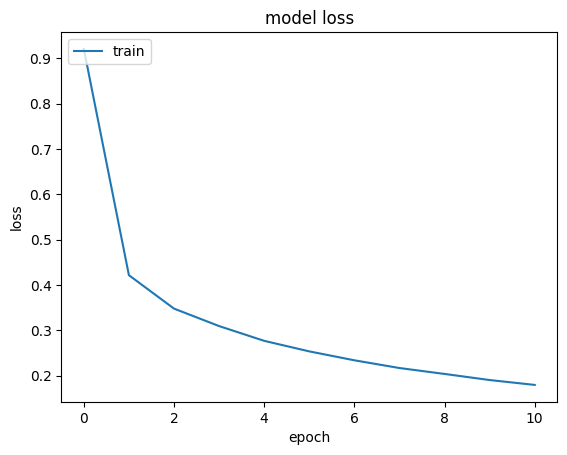

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()